# Australian Apparel Sales Analysis (Q4 2020)

**Author:** William Fort  
**Tools Used:** Python (Pandas, Matplotlib, Seaborn), Jupyter Notebook  
**Date:** *Insert final submission date*

---

# Executive Summary

This report presents a detailed analysis of AAL’s Q4 2020 apparel sales across Australian states and customer segments. Key trends in regional performance, demographic behavior, and time-of-day patterns were identified to guide strategic marketing and inventory decisions for the upcoming fiscal year.

### Key Findings:
- **Victoria (VIC)** generated the highest total revenue (~$105M).
- **All customer groups** contributed nearly evenly to total sales, with **Men** and **Women** slightly ahead.
- **Morning** time slot showed the highest average sales.
- **December** had a significant sales spike, while **early November** was a sales lull — an opportunity for future marketing.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set style for plots
sns.set(style='whitegrid')
%matplotlib inline


## 1. Data Loading & Inspection

In [3]:
df = pd.read_csv('AusApparalSales4thQrt2020.csv')
df.head()


,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


## 2. Data Cleaning & Normalization

In [4]:
# Overview of data types and memory usage
df.info()

# Check for missing values
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [5]:
# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%Y')

# Confirm the change
df.dtypes


Date     datetime64[ns]
Time             object
State            object
Group            object
Unit              int64
Sales             int64
dtype: object

In [6]:
# Min-Max normalization for Sales and Unit columns
df[['Sales_Norm', 'Unit_Norm']] = (df[['Sales', 'Unit']] - df[['Sales', 'Unit']].min()) / (df[['Sales', 'Unit']].max() - df[['Sales', 'Unit']].min())

# Preview normalized values
df[['Sales', 'Sales_Norm', 'Unit', 'Unit_Norm']].head()


,Sales,Sales_Norm,Unit,Unit_Norm
0,20000,0.095238,8,0.095238
1,20000,0.095238,8,0.095238
2,10000,0.031746,4,0.031746
3,37500,0.206349,15,0.206349
4,7500,0.015873,3,0.015873


## 3. Descriptive Statistics & Boxplots

In [7]:
# Descriptive statistics for original and normalized columns
desc_stats = df[['Sales', 'Unit', 'Sales_Norm', 'Unit_Norm']].describe()
desc_stats


,Sales,Unit,Sales_Norm,Unit_Norm
count,7560.000000,7560.000000,7560.000000,7560.000000
mean,45013.558201,18.005423,0.254054,0.254054
std,32253.506944,12.901403,0.204784,0.204784
min,5000.000000,2.000000,0.000000,0.000000
25%,20000.000000,8.000000,0.095238,0.095238
50%,35000.000000,14.000000,0.190476,0.190476
75%,65000.000000,26.000000,0.380952,0.380952
max,162500.000000,65.000000,1.000000,1.000000


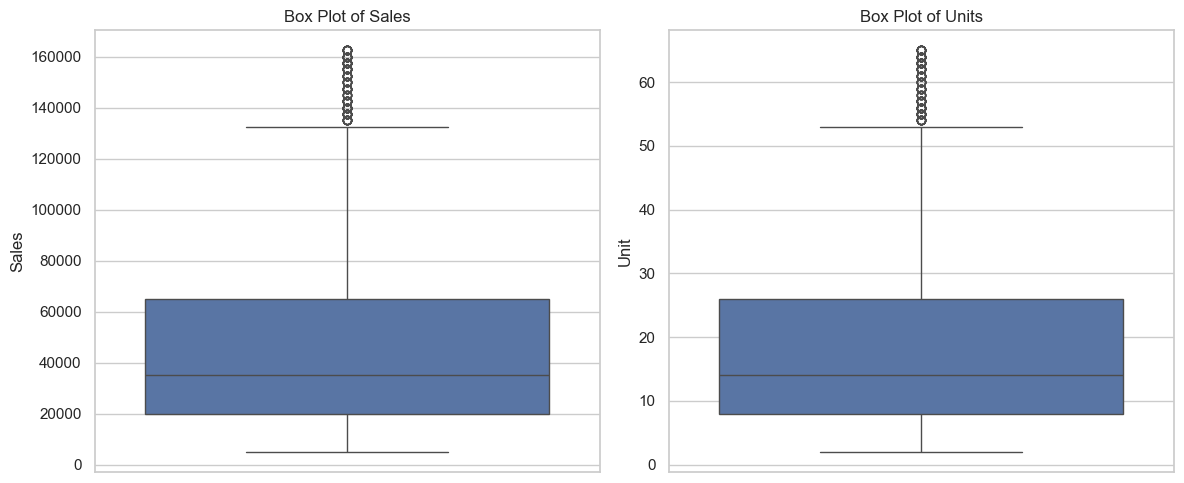

In [8]:
# Visualizing original Sales and Unit distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['Sales']).set_title('Box Plot of Sales')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Unit']).set_title('Box Plot of Units')

plt.tight_layout()
plt.show()


## 4. Group Analysis (State & Customer Group)

In [9]:
# Total revenue and units sold by state
state_summary = df.groupby('State')[['Sales', 'Unit']].sum().sort_values(by='Sales', ascending=False)
state_summary


,Sales,Unit
State,,
VIC,105565000,42226
NSW,74970000,29988
SA,58857500,23543
QLD,33417500,13367
TAS,22760000,9104
NT,22580000,9032
WA,22152500,8861


In [10]:
# Total revenue and units sold by group (Kids, Men, Women, Seniors)
group_summary = df.groupby('Group')[['Sales', 'Unit']].sum().sort_values(by='Sales', ascending=False)
group_summary


,Sales,Unit
Group,,
Men,85750000,34300
Women,85442500,34177
Kids,85072500,34029
Seniors,84037500,33615


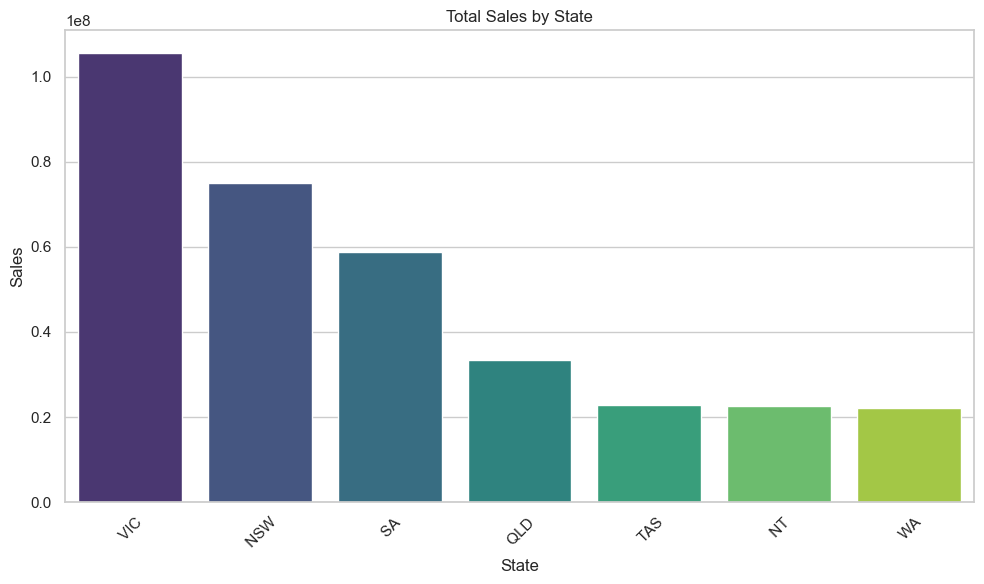

In [26]:
# Bar plot for state sales
plt.figure(figsize=(10, 6))
sns.barplot(x=state_summary.index, y=state_summary['Sales'], hue=state_summary.index, dodge=False, palette='viridis', legend=False)
plt.title('Total Sales by State')
plt.ylabel('Sales')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



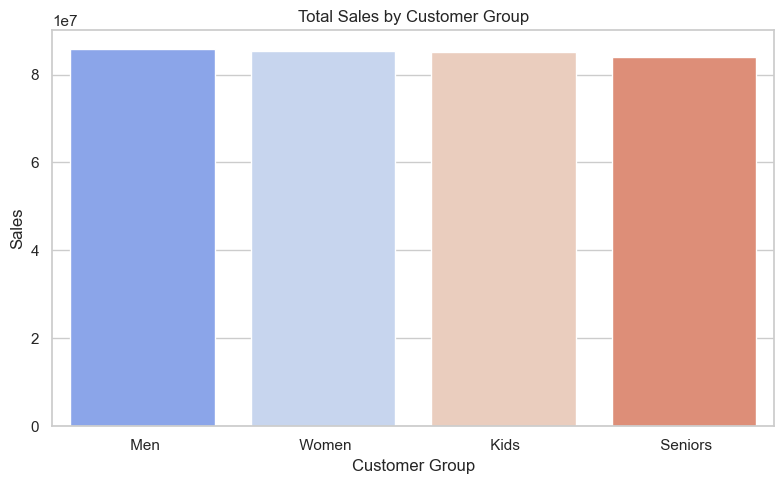

In [27]:
# Bar plot for customer group sales
plt.figure(figsize=(8, 5))
sns.barplot(x=group_summary.index, y=group_summary['Sales'], hue=group_summary.index, dodge=False, palette='coolwarm', legend=False)
plt.title('Total Sales by Customer Group')
plt.ylabel('Sales')
plt.xlabel('Customer Group')
plt.tight_layout()
plt.show()



## 5. Time of Day Trends

In [13]:
# Average sales by time of day
time_summary = df.groupby('Time')['Sales'].mean().sort_values(ascending=False)
time_summary


Time
Morning      45320.436508
Afternoon    45241.071429
Evening      44479.166667
Name: Sales, dtype: float64

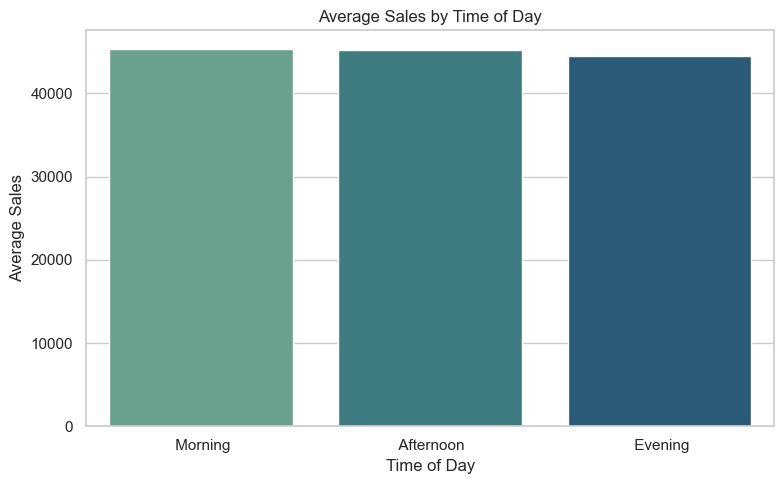

In [28]:
# Bar plot of average sales by time of day
plt.figure(figsize=(8, 5))
sns.barplot(x=time_summary.index, y=time_summary.values, hue=time_summary.index, dodge=False, palette='crest', legend=False)
plt.title('Average Sales by Time of Day')
plt.ylabel('Average Sales')
plt.xlabel('Time of Day')
plt.tight_layout()
plt.show()



## 6. Temporal Analysis (Weekly & Monthly)

In [22]:
# Reset index if 'Date' is not in columns
if 'Date' not in df.columns:
    df.reset_index(inplace=True)


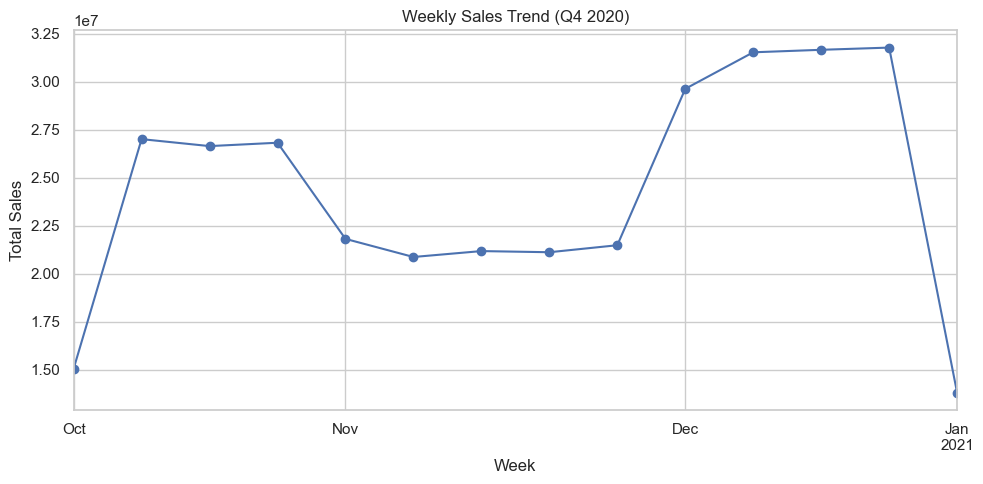

In [23]:
# Set Date as index
df.set_index('Date', inplace=True)

# Resample weekly sales
weekly_sales = df['Sales'].resample('W').sum()

# Plot
plt.figure(figsize=(10, 5))
weekly_sales.plot(marker='o')
plt.title('Weekly Sales Trend (Q4 2020)')
plt.ylabel('Total Sales')
plt.xlabel('Week')
plt.grid(True)
plt.tight_layout()
plt.show()


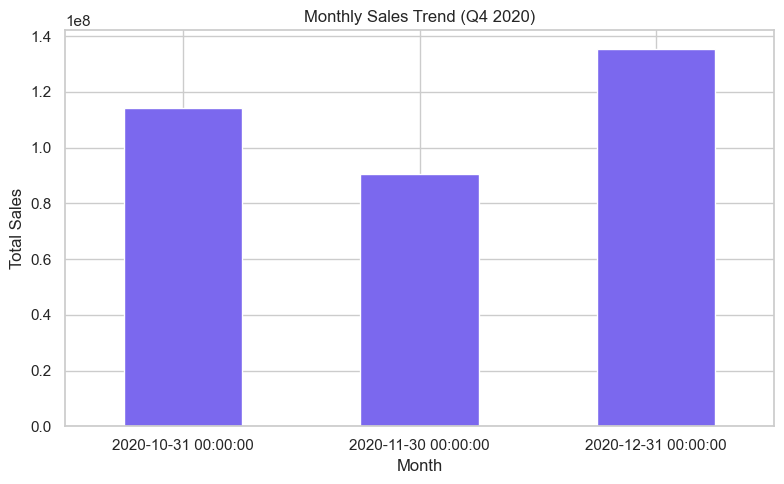

In [25]:
# Resample monthly sales
monthly_sales = df['Sales'].resample('ME').sum()

# Plot
plt.figure(figsize=(8, 5))
monthly_sales.plot(kind='bar', color='mediumslateblue')
plt.title('Monthly Sales Trend (Q4 2020)')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## 7. Final Summary & Recommendations

# 👔 AAL Q4 2020 Sales Analysis Summary

---

## 🔎 Key Insights

### 1. 📍 Top Performing States
- VIC led with over $105M in sales
- NSW and SA followed closely
- WA, NT, and TAS underperformed — ideal for targeted expansion

### 2. 👥 Customer Group Performance
- All groups (Men, Women, Kids, Seniors) performed nearly equally
- Slight edge for Men ($85.7M), followed by Women and Kids

### 3. 🕒 Time of Day Trends
- Morning hours had the highest average sales
- Suggest scheduling promotions in the morning for better reach

### 4. 📆 Temporal Patterns
- Weekly: Peaks in early October and December; dip in early November
- Monthly: December dominated Q4; November was comparatively weaker

---

## 🎯 Strategic Recommendations

- Focus marketing efforts in WA, NT, and TAS
- Schedule promotional campaigns during morning hours
- Boost visibility in early November to pre-empt the holiday rush
- Maintain demographic balance; personalize campaigns by state
- Prepare staffing and inventory for a December sales surge

---

## 🧠 Closing Note

This analysis offers a data-backed roadmap for optimizing sales strategy, improving timing of promotions, and expanding reach across both geography and demographics.

---

## 🛠️ Tools & Data Notes

- Dataset: `AusApparalSales4thQrt2020.csv`
- Tools: Python, Pandas, Seaborn, Matplotlib
- Environment: Jupyter Notebook (VS Code)
- Author: William Fort
